### Convolutional Neural Network

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title+str(img.shape))
    plt.show()

(200, 200, 3)
(200, 200)


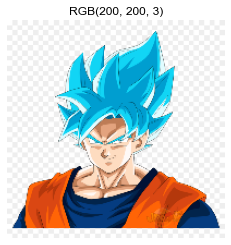

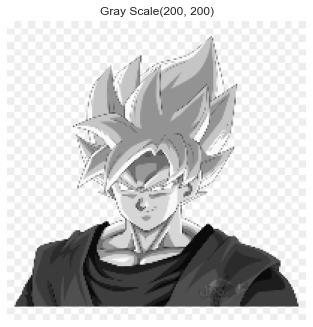

In [3]:
img_ = cv2.imread("goku.jpg")
img_ = cv2.resize(img_,(200,200))
print(img_.shape)
img = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
drawImg(img,"RGB")
drawImg(img_gray,"Gray Scale")

In [4]:
def convolutionOld(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(1,W-1):
        for col in range(1,H-1):
            for i in range(F):
                for j in range(F):
                    new_img[row-1][col-1] += img[row-1+i][col-1+j]*img_filter[i][j]
                if new_img[row-1][col-1] > 255:
                    new_img[row-1][col-1] = 255
                elif new_img[row-1][col-1] < 0:
                    new_img[row-1][col-1] = 0
                    
    return new_img

In [5]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
                    
    return new_img

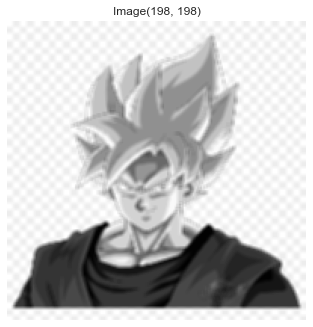

In [6]:
blur_filter = np.ones((3,3))/9.0
output1 = convolution(img_gray,blur_filter)
drawImg(output1)

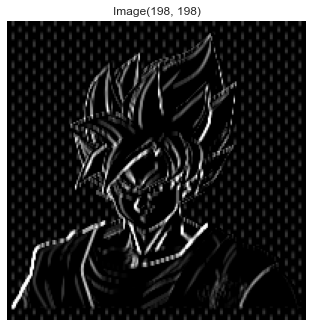

In [7]:
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])
output2 = convolution(img_gray,edge_filter)
drawImg(output2)

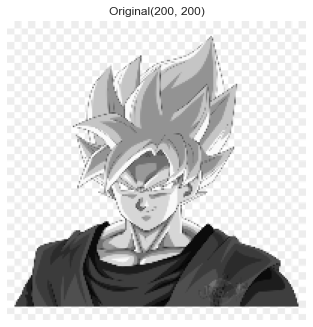

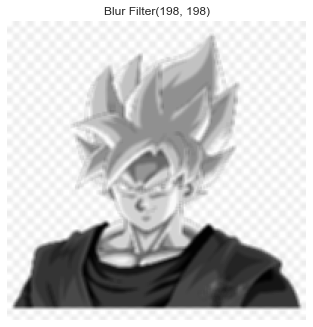

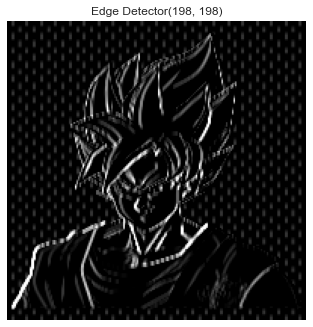

In [8]:
drawImg(img_gray,"Original")
drawImg(output1,"Blur Filter")
drawImg(output2,"Edge Detector")

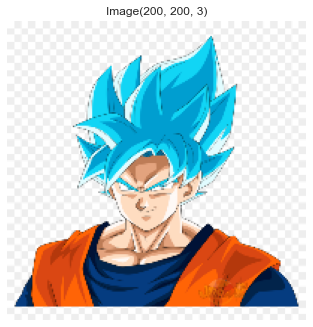

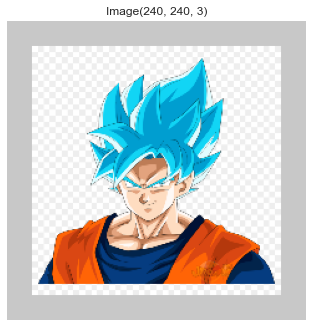

In [9]:
# Padding Image
pad_img = np.pad(img, ((20,20), (20,20), (0,0)), 'constant', constant_values =200)
drawImg(img)
drawImg(pad_img)

### Implementing Pooling Operation

In [10]:
X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]])

X_pool_output = np.zeros((2,2))

H,W = X.shape
f = 2
stride = 2

# Zero Padding
HO = int((H-f)/stride) + 1
WO = int((W-f)/stride) + 1

for r in range(HO):
    for c in range(WO):
        r_start = r*stride
        r_end  = r_start + f
        c_start = c*stride
        c_end = c_start + f
        
        X_slice = X[r_start:r_end,c_start:c_end]
        X_pool_output[r][c] = np.max(X_slice)

print("X \n",X)
print("\nX after Pooling \n",X_pool_output)


X 
 [[1 0 2 3]
 [4 6 6 8]
 [3 1 1 0]
 [1 2 2 4]]

X after Pooling 
 [[6. 8.]
 [3. 4.]]
